# PANDAS 

## Series 

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index.

In [ ]:
import pandas as pd

In [ ]:
obj = pd.Series([4, 7, -5, 3]);obj

You can get the array representation and index object of the Series via its values and index attributes, respectively:

In [ ]:
obj.values

In [ ]:
obj.index

We can assign indices to data points

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [ ]:
obj2

you can use labels in the index when selecting single values or a set of values:

In [ ]:
obj2['a']

In [ ]:
obj2[['c', 'a', 'd']]

Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [ ]:
obj2[obj2 > 0]

In [ ]:
obj2 > 0

In [ ]:
obj2*2

Another way to think about a Series is as a fixed-length, ordered dict, as it is a map‐ ping of index values to data values. 
<br> It can be used in many contexts where you might use a dict:

In [ ]:
 'b' in obj2

In [ ]:
 'e' in obj2

if you have dictionary you can create a series from it

In [ ]:
 sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [ ]:
obj3 = pd.Series(sdata)

In [ ]:
obj3

When you are only passing a dict, the index in the resulting Series will have the dict’s keys in sorted order. 
<br> You can override this by passing the dict keys in the order you want them to appear in the resulting Series:

In [ ]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [ ]:
obj4 = pd.Series(sdata, index=states);obj4

Here, three values found in sdata were placed in the appropriate locations, but since no value for 'California' was found, it appears as NaN (not a number), which is con‐ sidered in pandas to mark missing or NA values. 
<br> Since 'Utah' was not included in states, it is excluded from the resulting object.

The isnull and notnull functions in pandas should be used to detect missing data:

In [ ]:
pd.isnull(obj4)

In [ ]:
pd.notnull(obj4)

Series also has these as instance methods:

In [ ]:
obj4.isnull()

Both the Series object itself and its index have a name attribute which could be important in other parts of pandas

In [ ]:
obj4.name = 'population'

In [ ]:
obj4.index.name = 'state'

In [ ]:
obj4

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.

To create a dataframe you should call pd.DataFrame() function

In [ ]:
df=pd.DataFrame([[1,2,3],[4,5,6]]);df

Since we did not explicity set indices and columns it assigned numbers from 0 to N

In [ ]:
df=pd.DataFrame([[1,2,3],[4,5,6]],index=["a","b"],columns=list("klm"));df

There are many ways to construct a DataFrame, though one of the most common is from a dict of equal-length lists or NumPy arrays

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
            'year': [2000, 2001, 2002, 2001, 2002, 2003],
            'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [ ]:
data

In [ ]:
frame = pd.DataFrame(data);frame

# Getting columns of a dataframe

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute:

In [ ]:
frame["state"]

In [ ]:
frame.state

get the year columns

frame2[column] works for any column name, but frame2.column only works when the column name is a valid Python variable name.
<br> for example if there is space in the column name frame2.column will not work

Columns can be modified by assignment

In [ ]:
frame['debt'] = 16.5 ; frame

When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame

In [ ]:
import numpy as np

In [ ]:
frame['debt'] = np.arange(10,16) ; frame

Try above script np.arange(10,17)

If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes:

In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five']); val

first create a dataframe with indices name this dataframe as frame2

In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                          index=['one', 'two', 'three', 'four',
                                     'five', 'six'])

In [ ]:
frame2

assing debt column with np.arange(1,7)

now assign debt column as val series

In [ ]:
frame2

The del keyword will delete columns as with a dict.

In [ ]:
del frame2["debt"];frame2

to create a new column you should assignment

In [ ]:
frame2["size"]=np.arange(100,700,100);frame2

frame2.columns and frame2.index return columsn and indices

In [ ]:
frame2.columns 

In [ ]:
frame2.index

In [ ]:
frame2.values

If the DataFrame’s columns are different dtypes, the dtype of the values array will be chosen to accommodate all of the columns:

## Possible data inputs to DataFrame constructor

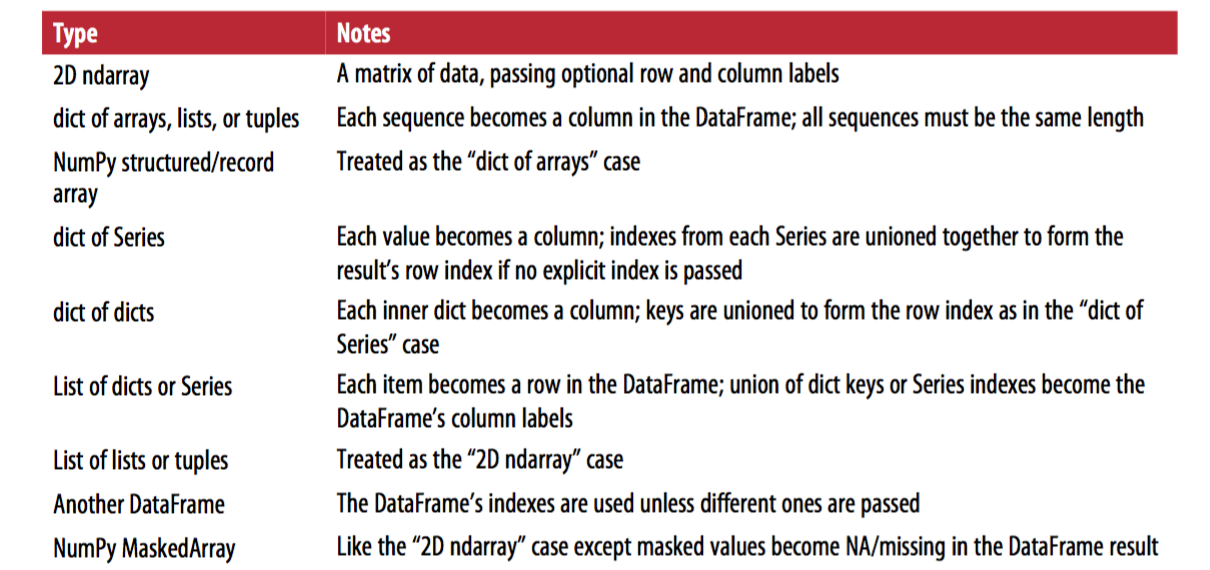

## Reindexing

An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index.

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c']);obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e']);obj2

With DataFrame, reindex can alter either the (row) index, columns, or both. 
<br> When passed only a sequence, it reindexes the rows in the result:

In [ ]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                             index=['a', 'c', 'd'],
                            columns=['Ohio', 'Texas', 'California'])

In [ ]:
frame

In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd']); frame2

The columns can be reindexed with the columns keyword:

In [ ]:
states = ['Texas', 'Utah', 'California']

In [ ]:
frame.reindex(columns=states)

## Dropping Entries from an Axis

Dropping one or more entries from an axis is easy if you already have an index array or list without those entries. 
<br> drop method will return a new object with the indicated value or values deleted from an axis:

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e']);obj

In [ ]:
 new_obj = obj.drop('c') ; new_obj

In [ ]:
 data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                           index=['Ohio', 'Colorado', 'Utah', 'New York'],
                           columns=['one', 'two', 'three', 'four'])


In [ ]:
data

In [ ]:
data.drop(['Colorado', 'Ohio'])

You can drop values from the columns by passing axis=1 or axis='columns':

In [ ]:
data.drop('two', axis=1)

drop columns "one" and "four"

Many functions, like drop, which modify the size or shape of a Series or DataFrame, can manipulate an object in-place without returning a new object:

In [ ]:
 data.drop(['two', 'three'], axis='columns',inplace=True)

In [ ]:
data

## Indexing, Selection, and Filtering

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                           index=['Ohio', 'Colorado', 'Utah', 'New York'],
                           columns=['one', 'two', 'three', 'four'])

In [ ]:
data

In [ ]:
data['two']

In [ ]:
data[:2]

The row selection syntax data[:2] is provided as a convenience. 
<br> Passing a single element or a list to the [] operator selects columns.

## booelan indexing 

In [ ]:
data['three'] > 5

In [ ]:
data[data['three'] > 5]

## Selection with loc and iloc

we can select a subset of rows or columns
<br> iloc: positional index
<br> loc: label index

In [ ]:
data

In [ ]:
 data.loc['Colorado', ['two', 'three']]

In [ ]:
 data.loc['Colorado']

In [ ]:
 data.loc[['Colorado',"Utah"]]

In [ ]:
 data.loc[:,['two',"four"]]

get ohio and utah rows

get only "one" "three" columns

get ohio and utah rows and "one","three"columns

get the first two rows

get the last two columns

get first two rows and last two columns

# Function Application and Mapping

frame.apply(): Applying a function on one-dimensional arrays to each column or row

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                         index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [ ]:
frame

In [ ]:
f = lambda x: x.max() - x.min()

In [ ]:
frame.apply(f)

In [ ]:
frame.apply(lambda x: x.max() - x.min())

In [ ]:
frame.apply(f,axis="columns")

In [ ]:
frame.apply(f,axis=1)

### The function passed to apply need not return a scalar value; it can also return a Series with multiple values:

In [ ]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [ ]:
frame.apply(f)

## to apply on all the elements use applymap() function

In [ ]:
myfunct=lambda x: x**2

In [ ]:
frame.applymap(myfunct)

## To apply element-wise on series use map() function 

In [ ]:
 frame['e'].map(myfunct)

# Sorting

## Sorting index 

In [ ]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [ ]:
obj

In [ ]:
obj.sort_index()

Try sortin index with mixed data type string and integers

In [ ]:
obj = pd.Series(range(8), index=['d', 'a', 'b', 'c',4,2,3,1])

In [ ]:
obj

In [ ]:
obj.sort_index()

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                            index=['three', 'one'],
                         columns=['d', 'a', 'b', 'c'])

In [ ]:
frame

In [ ]:
frame.sort_index()

In [ ]:
frame.sort_index(axis=1)

In [ ]:
frame

by default it is not a inplace operation, to make it inplace inplace=True

In [ ]:
frame.sort_index(axis=1,inplace=True)

In [ ]:
frame

## Sorting by values 

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [ ]:
frame

In [ ]:
frame.sort_values(by="a")

To sort by multiple columns, pass a list of names:

In [ ]:
frame.sort_values(by=['a', 'b'])

## Axis Indexes with Duplicate Labels

In [ ]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [ ]:
obj

The index’s is_unique property can tell you whether its labels are unique or not:

In [ ]:
obj.index.is_unique

Indexing a label with multiple entries returns a Series, while single entries return a scalar value:

In [ ]:
obj['a']

In [ ]:
obj['c']

This can make your code more complicated, as the output type from indexing can
vary based on whether a label is repeated or not.

In [ ]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [ ]:
df

In [ ]:
df.loc['b']

# Descriptive Statistics

In [ ]:
df = pd.DataFrame([[2.0, np.nan], [7, -4], [np.nan, np.nan], [1, -2]],
index=['a', 'b', 'c', 'd'],columns=['one', 'two'])

In [ ]:
df

Calling DataFrame’s sum method returns a Series containing column sums:

In [ ]:
df.sum()

Passing axis='columns' or axis=1 sums across the columns instead:

In [ ]:
df.sum(axis=1)

NA values are excluded unless the entire slice (row or column in this case) is NA. 
<br> This can be disabled with the skipna option:

In [ ]:
 df.mean(axis='columns', skipna=False)

producing multiple summary statistics in one shot:

In [ ]:
df.describe()

### Descriptive and summary statistics

<div>
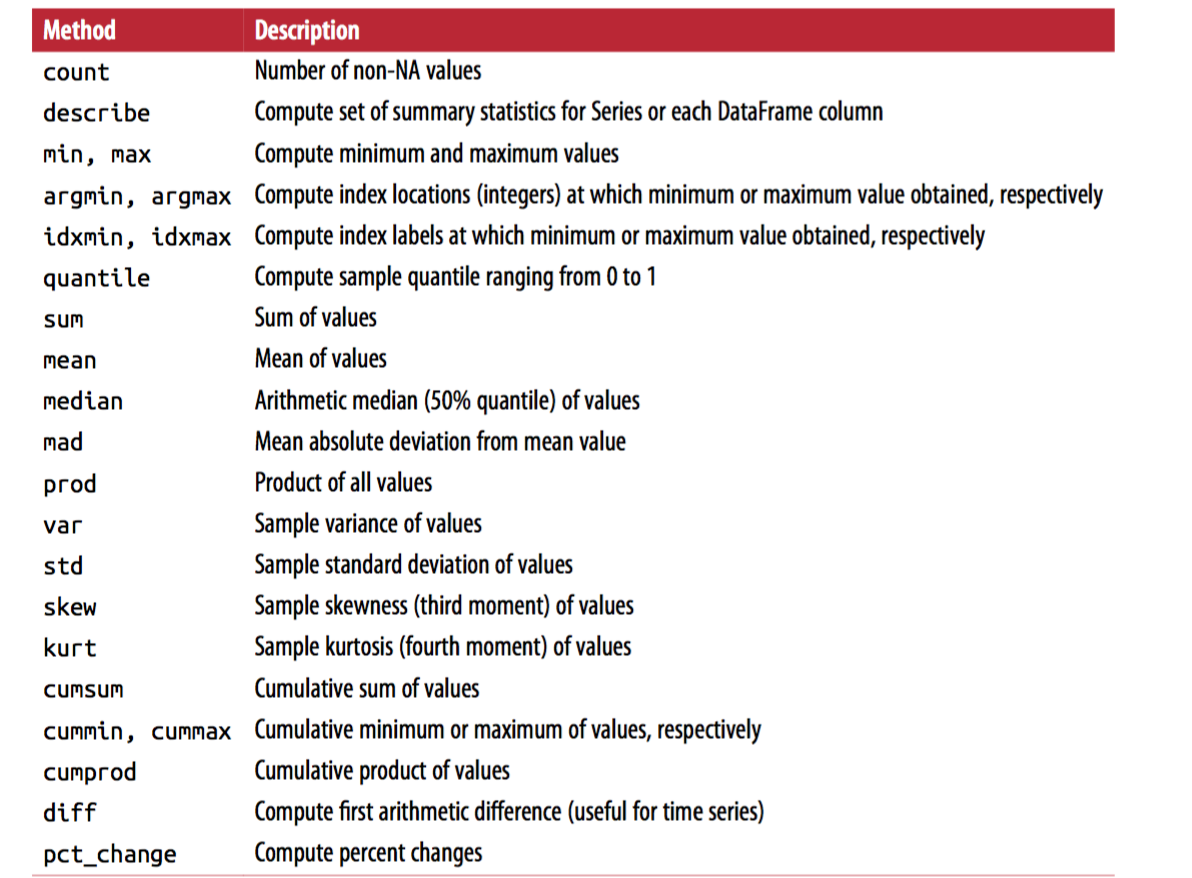
<div>

Example for pct_change:

In [ ]:
df = pd.DataFrame({
  'FR': [4.0405, 4.0963, 4.3149],
   'GR': [1.7246, 1.7482, 1.8519],
    'IT': [804.74, 810.01, 860.13]},
.    index=['1980-01-01', '1980-02-01', '1980-03-01'])

In [ ]:
df

In [ ]:
df.pct_change()

Periods to shift for forming percent change.

In [ ]:
df.pct_change(periods=2)

In [ ]:
np.random.seed(1)
df=pd.DataFrame(np.random.randint(5,10,(4,4)),index=list("abcd"),columns=list("xyzt"));df

In [ ]:
df.diff()

In [ ]:
df.diff(axis="columns")

# Unique Values, Value Counts, and Membership

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c']);obj

In [ ]:
uniques = obj.unique()

In [ ]:
uniques

In [ ]:
obj.value_counts()

isin performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame

In [ ]:
mask = obj.isin(['b', 'c'])

In [ ]:
mask

In [ ]:
obj[mask]

In [ ]:
np.random.seed(1)
df=pd.DataFrame(np.random.randint(5,10,(4,4)),index=list("abcd"),columns=list("xyzt"));df

In [ ]:
df.value_counts()

In [ ]:
df.x.value_counts()

In [ ]:
df.apply(pd.value_counts)

In [ ]:
df.apply(pd.value_counts).fillna(0)